### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import and Inspection data 

In [2]:
data = pd.read_excel('startup-expansion.xlsx')

In [3]:
data.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
Store ID           150 non-null int64
City               150 non-null object
State              150 non-null object
Sales Region       150 non-null object
New Expansion      150 non-null object
Marketing Spend    150 non-null int64
Revenue            150 non-null int64
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [5]:
data.shape

(150, 7)

In [6]:
# Summary statistics for Marketing Spend and revenue columns
round(data[['Marketing Spend', 'Revenue']].describe(), 2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


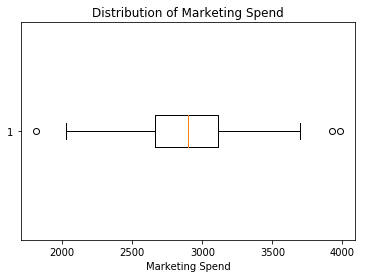

In [7]:
plt.boxplot(data['Marketing Spend'], vert=False)
plt.xlabel('Marketing Spend')
plt.title('Distribution of Marketing Spend');

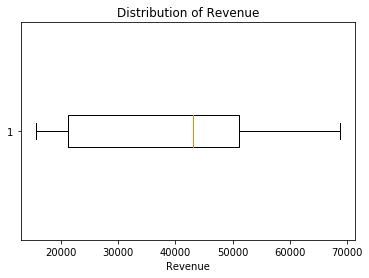

In [8]:
plt.boxplot(data['Revenue'], vert=False)
plt.xlabel('Revenue')
plt.title('Distribution of Revenue');

### Processing Data

In [9]:
# Exploring the unique values for each column
data.nunique()

Store ID           150
City               149
State               35
Sales Region         2
New Expansion        2
Marketing Spend    142
Revenue            150
dtype: int64

In [10]:
# Adding a column for profit
data['Profit'] = data['Revenue'] - data['Marketing Spend']

In [11]:
data.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018


In [12]:
# Summary statistics for profit
round(data['Profit'].describe(),2)

count      150.00
mean     36408.29
std      15435.41
min      12433.00
25%      18339.00
50%      40053.00
75%      48163.25
max      66388.00
Name: Profit, dtype: float64

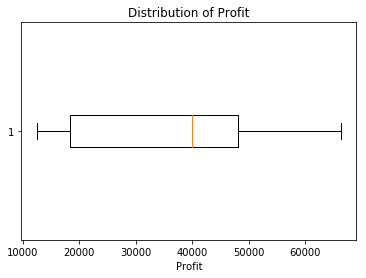

In [13]:
plt.boxplot(data['Profit'], vert=False)
plt.xlabel('Profit')
plt.title('Distribution of Profit');

In [14]:
# Check for duplicates
data.duplicated().sum()

0

In [15]:
# Check for nulls
data.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
Profit             0
dtype: int64

In [16]:
data['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [17]:
data['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [18]:
data['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

### Analyzing and Visualizing Data

### Q.1) What is the correlaion between features?

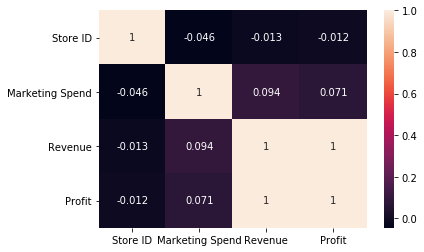

In [19]:
#find the correlation of dataset
sns.heatmap(data.corr(), annot=True);

### Q.2) What is the top 10 profitable cities?

In [20]:
top_10_profit_city = round(data.groupby("City")["Profit"]
                                   .mean()
                                   .sort_values(ascending = False)
                                   .head(10), 2)
top_10_profit_city

City
Little Rock       66388.0
Grand Rapids      62667.0
Oxnard            61984.0
Fontana           59942.0
Brownsville       59473.0
Providence        59146.0
Birmingham        57228.0
Worcester         57165.0
Overland Park     57018.0
San Bernardino    56471.0
Name: Profit, dtype: float64

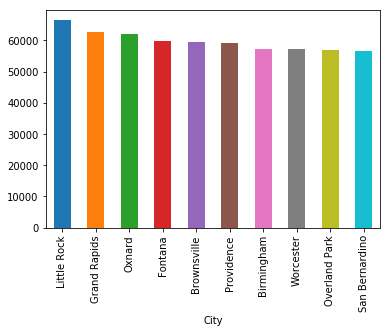

In [21]:
top_10_profit_city.plot(
    kind = 'bar')

### Q.3) What is the top 10 profitable states?

In [22]:
top_10_profit_states = round(data.groupby("State")["Profit"].mean().sort_values(ascending = False).head(10), 2)
top_10_profit_states

State
Arkansas        66388.00
Rhode Island    59146.00
Alabama         52113.75
Mississippi     51235.00
New York        50536.33
Tennessee       47652.00
South Dakota    47636.00
Michigan        46619.33
Virginia        45389.00
Louisiana       45355.50
Name: Profit, dtype: float64

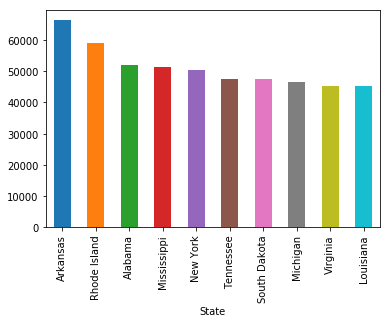

In [23]:
top_10_profit_states.plot(
    kind = 'bar')

### Q.4) What is the top profitable sales region?

In [24]:
region_mean_profit = round(data.groupby("Sales Region")["Profit"]
                                   .mean()
                                   .sort_values(ascending = False)
                                   .head(10), 2)
region_mean_profit

Sales Region
Region 1    37678.20
Region 2    35463.23
Name: Profit, dtype: float64

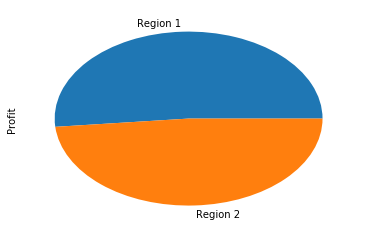

In [25]:
region_mean_profit.plot(
    kind = 'pie')

### Q.5) What is the top profitable expansion?

In [26]:
expansion_mean_profit = round(data.groupby("New Expansion")["Profit"]
                                   .mean()
                                   .sort_values(ascending = False)
                                   .head(10), 2)
expansion_mean_profit

New Expansion
New    42901.00
Old    35944.52
Name: Profit, dtype: float64

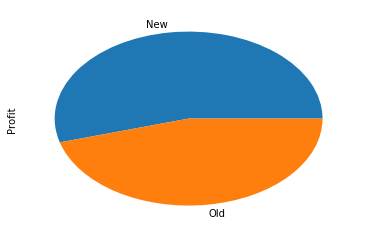

In [27]:
expansion_mean_profit.plot(
    kind = 'pie')

## Analyze the new expansion

In [28]:
data_new_expansion = data[data['New Expansion'] == 'New']

In [29]:
data_new_expansion.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
140,141,Chattanooga,Tennessee,Region 2,New,3587,55357,51770
142,143,Joliet,Illinois,Region 1,New,3279,48315,45036
144,145,Glendale,California,Region 2,New,2363,49376,47013
141,142,Tempe,Arizona,Region 2,New,2911,48954,46043
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
149,150,Thousand Oaks,California,Region 2,New,2431,40141,37710
143,144,Rancho Cucamonga,California,Region 2,New,2945,52366,49421
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
148,149,College Station,Texas,Region 2,New,2994,22457,19463


### Q.6) What is the top 10 profitable cities (New Expansion)?

In [30]:
top_10_profitable_cities_new = round(data_new_expansion.groupby("City")["Profit"]
                                   .mean()
                                   .sort_values(ascending = False)
                                   .head(10), 2)
top_10_profitable_cities_new

City
Brownsville         59473
Chattanooga         51770
Rancho Cucamonga    49421
Glendale            47013
Tempe               46043
Joliet              45036
Rockford            40729
Thousand Oaks       37710
Paterson            32352
College Station     19463
Name: Profit, dtype: int64

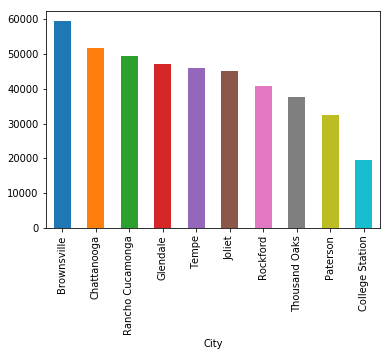

In [31]:
top_10_profitable_cities_new.plot(
    kind = 'bar')

### Q.7) What is the mean profit for each state (New Expansion)?

In [32]:
states_mean_profit_new = round(data_new_expansion.groupby("State")["Profit"].mean().sort_values(ascending = False).head(10), 2)

states_mean_profit_new

State
Tennessee     51770.00
Arizona       46043.00
California    44714.67
Illinois      42882.50
Texas         39468.00
New Jersey    32352.00
Name: Profit, dtype: float64

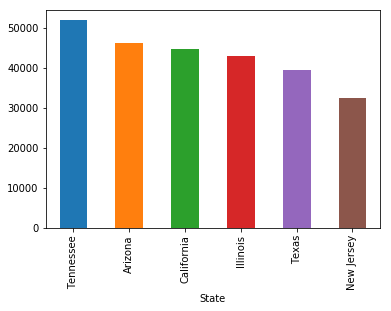

In [33]:
states_mean_profit_new.plot(
    kind = 'bar')

### Q.8) What is the mean profit for each Region (New Expansion)?

In [34]:
region_mean_profit_new = round(data_new_expansion.groupby("Sales Region")["Profit"]
                                 .mean().sort_values(ascending = False), 2)
region_mean_profit_new

Sales Region
Region 2    44413.29
Region 1    39372.33
Name: Profit, dtype: float64

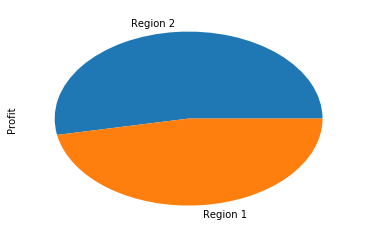

In [35]:
region_mean_profit_new.plot(
    kind = 'pie')